In [1]:
import torch
import random
import matplotlib.pyplot as plt

In [2]:
from preprocess import VerificationDataset, split_eval

In [3]:
random.seed(10)

In [4]:
backPath = './data/background'
evalPath = './data/evaluation'

In [5]:
dic_idxs_eval = split_eval(backPath, evalPath)

In [6]:
dic_idxs_eval

{'drawer': {'back': [2, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 19],
  'test': [0, 3, 1, 18],
  'valid': [17, 15, 13, 7]},
 'alphabet': {'test': [16, 15, 10, 2, 7, 11, 5, 0, 6, 19],
  'valid': [1, 3, 4, 8, 9, 12, 13, 14, 17, 18]}}

In [23]:
BackgroundDataset = VerificationDataset(backPath, 6, 
                            dic_idxs_eval['drawer']['back'])

(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)


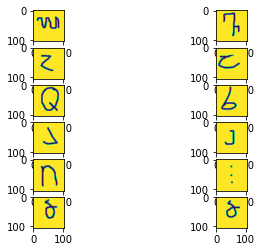

In [26]:
rows = len(BackgroundDataset)
for i in range(1,2*rows,2):
    img1, img2, label = BackgroundDataset[(i-1)/2]
    print(img1.shape, img2.shape)
    ax = plt.subplot(rows, 2, i)
    ax = plt.imshow(img1)
    ax = plt.subplot(rows, 2, i+1)
    ax = plt.imshow(img2)